# Planteamiento del proyecto
El departamento de Recursos Humanos ya está usando tu modelo de predicción de estrés y todo apunta a que funciona a la perfección. Sin embargo, para poder prevenir correctamente el estrés, RR. HH. quiere saber cuáles son sus causas. Por lo tanto, te solicitan investigar los datos usados para el modelo de regresión y determinar los factores principales del estrés.

El dataset a utilizar es el que aparece en la carpeta: [Sleep Health and Lifestyle Dataset](./Sleep_health_and_lifestyle_dataset.csv)

Objetivos a cumplir:
1. Seleccionar un algoritmo que pueda indicar qué factor es más importante para determinar ese estrés.
2. Responde y argumenta: ¿es este componente el mismo que determinaste al usar el modelo de regresión?
3. Determina qué factores distinguen más los datos entre los niveles que se te solicitó en el ejercicio de regresión: no estresado (0-3), estresado (3-6), extremadamente estresado (7-8).


In [1]:
# Importación de algunas librerías
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rn_state = 42

Variables del dataset:
- ***patientid:*** Numero identificativo del paciente(único).
- ***age:*** Edad.
- ***gender:*** Género, 0 (female), 1 (male).
- ***chestpain:*** Tipo de dolor en el pecho,  0 (angina típica), 1 (angina atípica), 2 (dolor no anginoso), 3 (asintomático).
- ***restingBP:*** Presión arterial en reposo, 94-200 (in mm HG).
- ***serumcholestrol:*** Colesterol sérico, 126-564 (in mg/dl).
- ***fastingbloodsugar:*** Glucemia en ayunas, 0 (false), 1 (true) > 120 mg/dl.
- ***restingelectro:***  Resultados del electrocardiograma en reposo, 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy).
- ***maxheartrate:*** Frecuencia cardíaca máxima alcanzada, 71-202.
- ***exerciseangia:*** Angina inducida por el ejercicio, 0 (no), 1 (yes).
- ***oldpeak:*** Viejo pico = ST, 0-6.2.
- ***slope:*** Pendiente del segmento ST del ejercicio máximo, 1 (pendiente ascendente), 2 (plana), 3 (pendiente descendente).
- ***noofmajorvessels:*** Número de vasos mayores (0, 1, 2, 3).
- ***tarjet*** Clasificación resultado 0 (Ausencia de enfermedad cardíaca), 1 (Presencia de enfermedad cardíaca).

## 1. Primer contacto con los datos

En este apartado cargaremos los datos y realizaremos una exploración de los mismos.

### 1.1. Carga de los datos

Cargamos los datos en un dataframe de pandas.

In [2]:
df_stress = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df_stress.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 1.2. Limpieza de los datos

En este apartado realizaremos una limpieza de los datos.
- Obtenemos información del dataset.
- Sacamos los parámetros estadísticos más relevantes de las variables
- Identificamos y eliminamos los valores nulos y duplicados.
- Realizamos una transformación de variables para que sean más fáciles de analizar, si es necesario.
- Eliminamos las variables que no aportan ninguna información relevante.


In [3]:
# Mostramos información de los datos
df_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# Hacemos un resumen de las métricas estadísticas más relevantes de los datos
df_stress.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
# Vemos la cantidad de valores NaN que hay
df_stress.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

En *Sleep Disorder* aparecen 219, pero no son NaN si no que en esa variable ese valor representa que no hay ningún trastorno del sueño.

In [6]:
df_stress.duplicated().sum()

0

No hay ni datos perdidos ni duplicados, solo tenemos que hacer los cambios pertinentes en las variables y pasar al estudio EDA.

In [7]:
# Quitamos la variables que no aportan información
df_stress_clean = df_stress.drop(columns='Person ID')
df_stress_clean['Sleep Disorder'] = df_stress_clean['Sleep Disorder'].fillna('No Disorder')
df_stress_clean.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Vamos a agrupar las ocupaciones por categoría profesional: 

**Salud**
- Nurse
- Doctor

**Ingeniería y Tecnología**
- Engineer
- Software Engineer
- Scientist

**Legal y Administrativo**
- Lawyer
- Accountant

**Educación**
- Teacher

**Ventas y Gestión**
- Salesperson
- Sales Representative
- Manager

Con esto conseguimos reducir la cantidad de ocupaciones a 5 en vez de 11.

In [8]:
# Definir una función para categorizar las ocupaciones
def categorize_occupation(occupation):
    if occupation in ['Nurse', 'Doctor']:
        return 'Health'
    elif occupation in ['Engineer', 'Software Engineer', 'Scientist']:
        return 'Engineering and Technology'
    elif occupation in ['Lawyer', 'Accountant']:
        return 'Legal and Administrative'
    elif occupation == 'Teacher':
        return 'Education'
    elif occupation in ['Salesperson', 'Sales Representative', 'Manager']:
        return 'Sales and Management'
    else:
        return 'Other'

In [9]:
df_stress_clean['Occupation_cat'] = df_stress_clean['Occupation'].apply(categorize_occupation)

# Eliminamos la columna 'Ocupation'
df_stress_clean = df_stress_clean.drop(columns='Occupation')

# Pasamos a float la variable Blood Pressure
df_stress_clean['Blood Pressure'] = df_stress_clean['Blood Pressure'].apply(lambda x: round(eval(x), 2))
df_stress_clean.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_cat
0,Male,27,6.1,6,42,6,Overweight,1.52,77,4200,No Disorder,Engineering and Technology
1,Male,28,6.2,6,60,8,Normal,1.56,75,10000,No Disorder,Health
2,Male,28,6.2,6,60,8,Normal,1.56,75,10000,No Disorder,Health
3,Male,28,5.9,4,30,8,Obese,1.56,85,3000,Sleep Apnea,Sales and Management
4,Male,28,5.9,4,30,8,Obese,1.56,85,3000,Sleep Apnea,Sales and Management


### 1.3. EDA 

En esta etapa vamos a realizar un análisis más exaustivo de las variables.
- Distribución de la variable 'Stress Level'
- Distribución de las variables numéricas.
- Relación entre las variables numéricas y la variable 'Stress Level'.
- Relación entre las variables categóricas y la variable 'Stress Level'.
- Matriz de correlación
- Análisis de Outliers

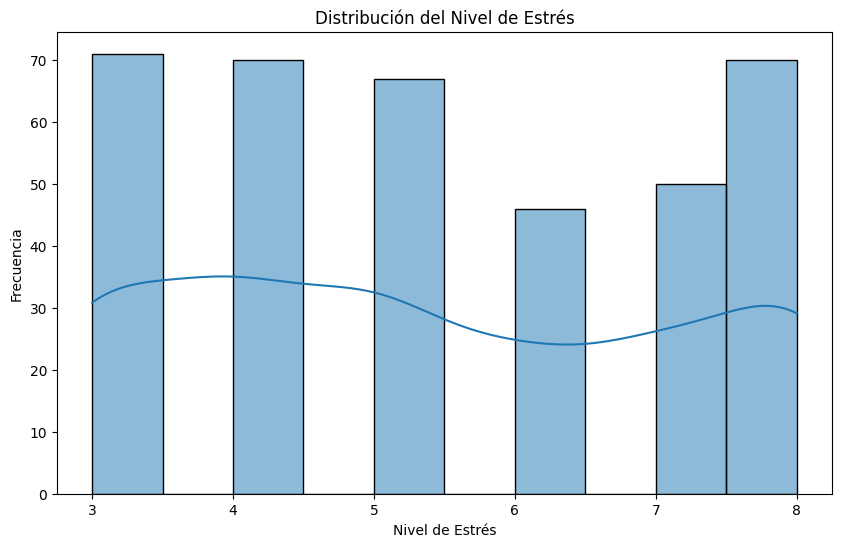

In [10]:
# Distribución de la variable 'Stress Level'
plt.figure(figsize=(10, 6))
sns.histplot(df_stress_clean['Stress Level'], bins=10, kde=True)
plt.title('Distribución del Nivel de Estrés')
plt.xlabel('Nivel de Estrés')
plt.ylabel('Frecuencia')
plt.show()

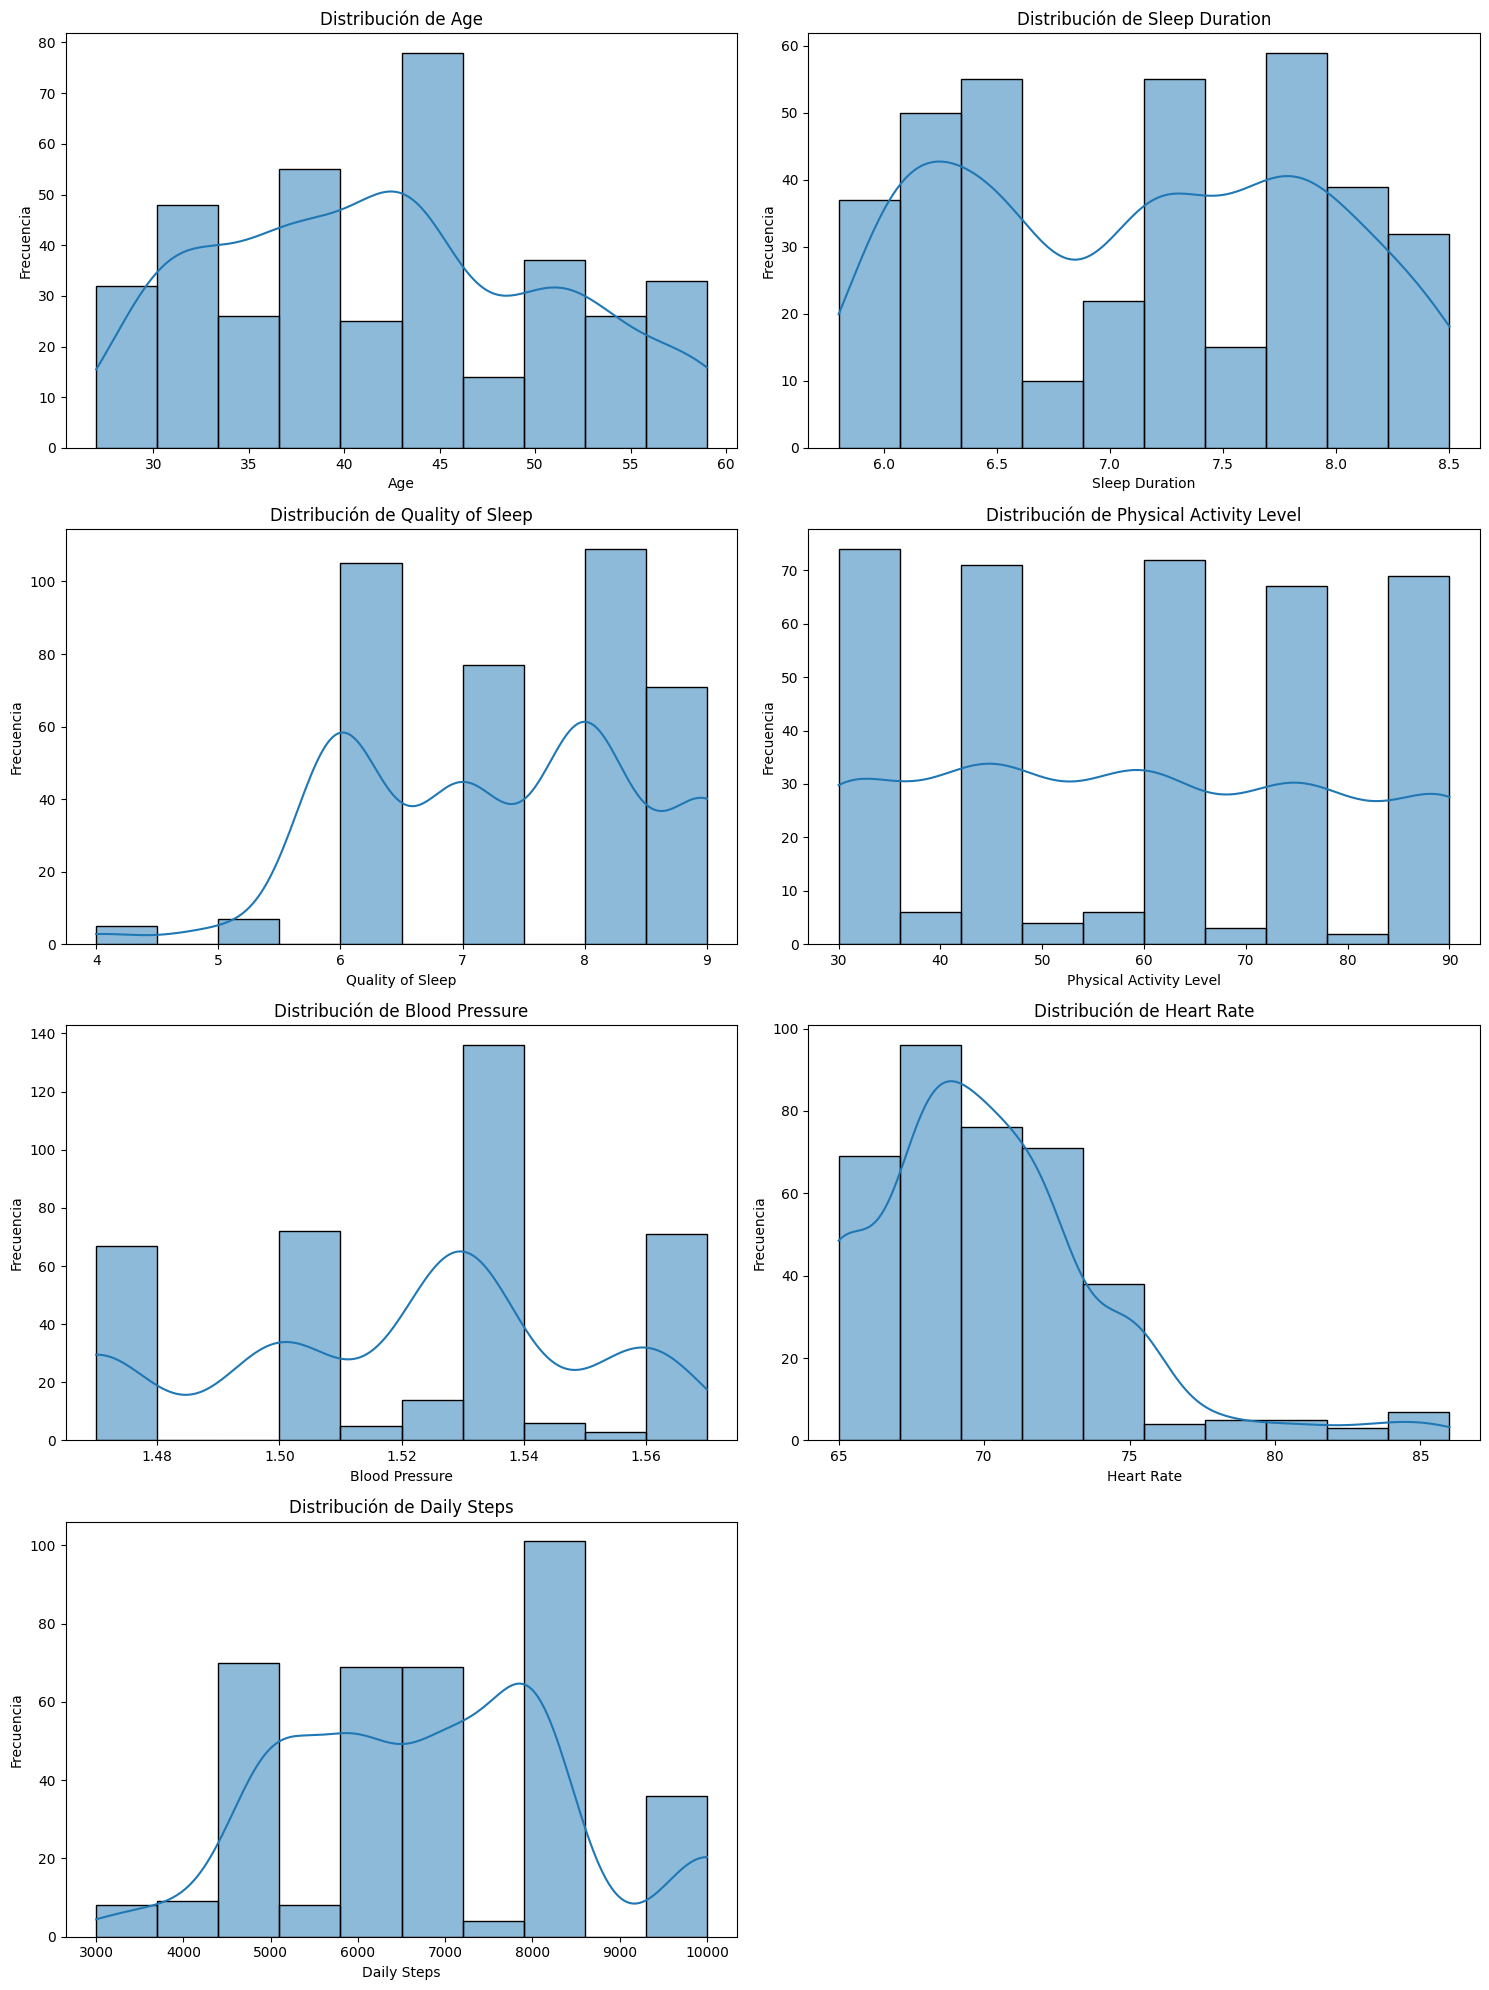

In [15]:
# Distribución de las variables numéricas
numerical_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                  'Physical Activity Level', 'Blood Pressure',
                  'Heart Rate', 'Daily Steps']

# Configuración de subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Aplanar la matriz de ejes para un acceso más fácil
axes = axes.flatten()

# Plot de las distribuciones
for i, var in enumerate(numerical_vars):
    sns.histplot(df_stress_clean[var], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Eliminar el último subplot si hay un número impar de subplots
fig.delaxes(axes[-1])

# Ajustar el layout
plt.tight_layout()
plt.show()

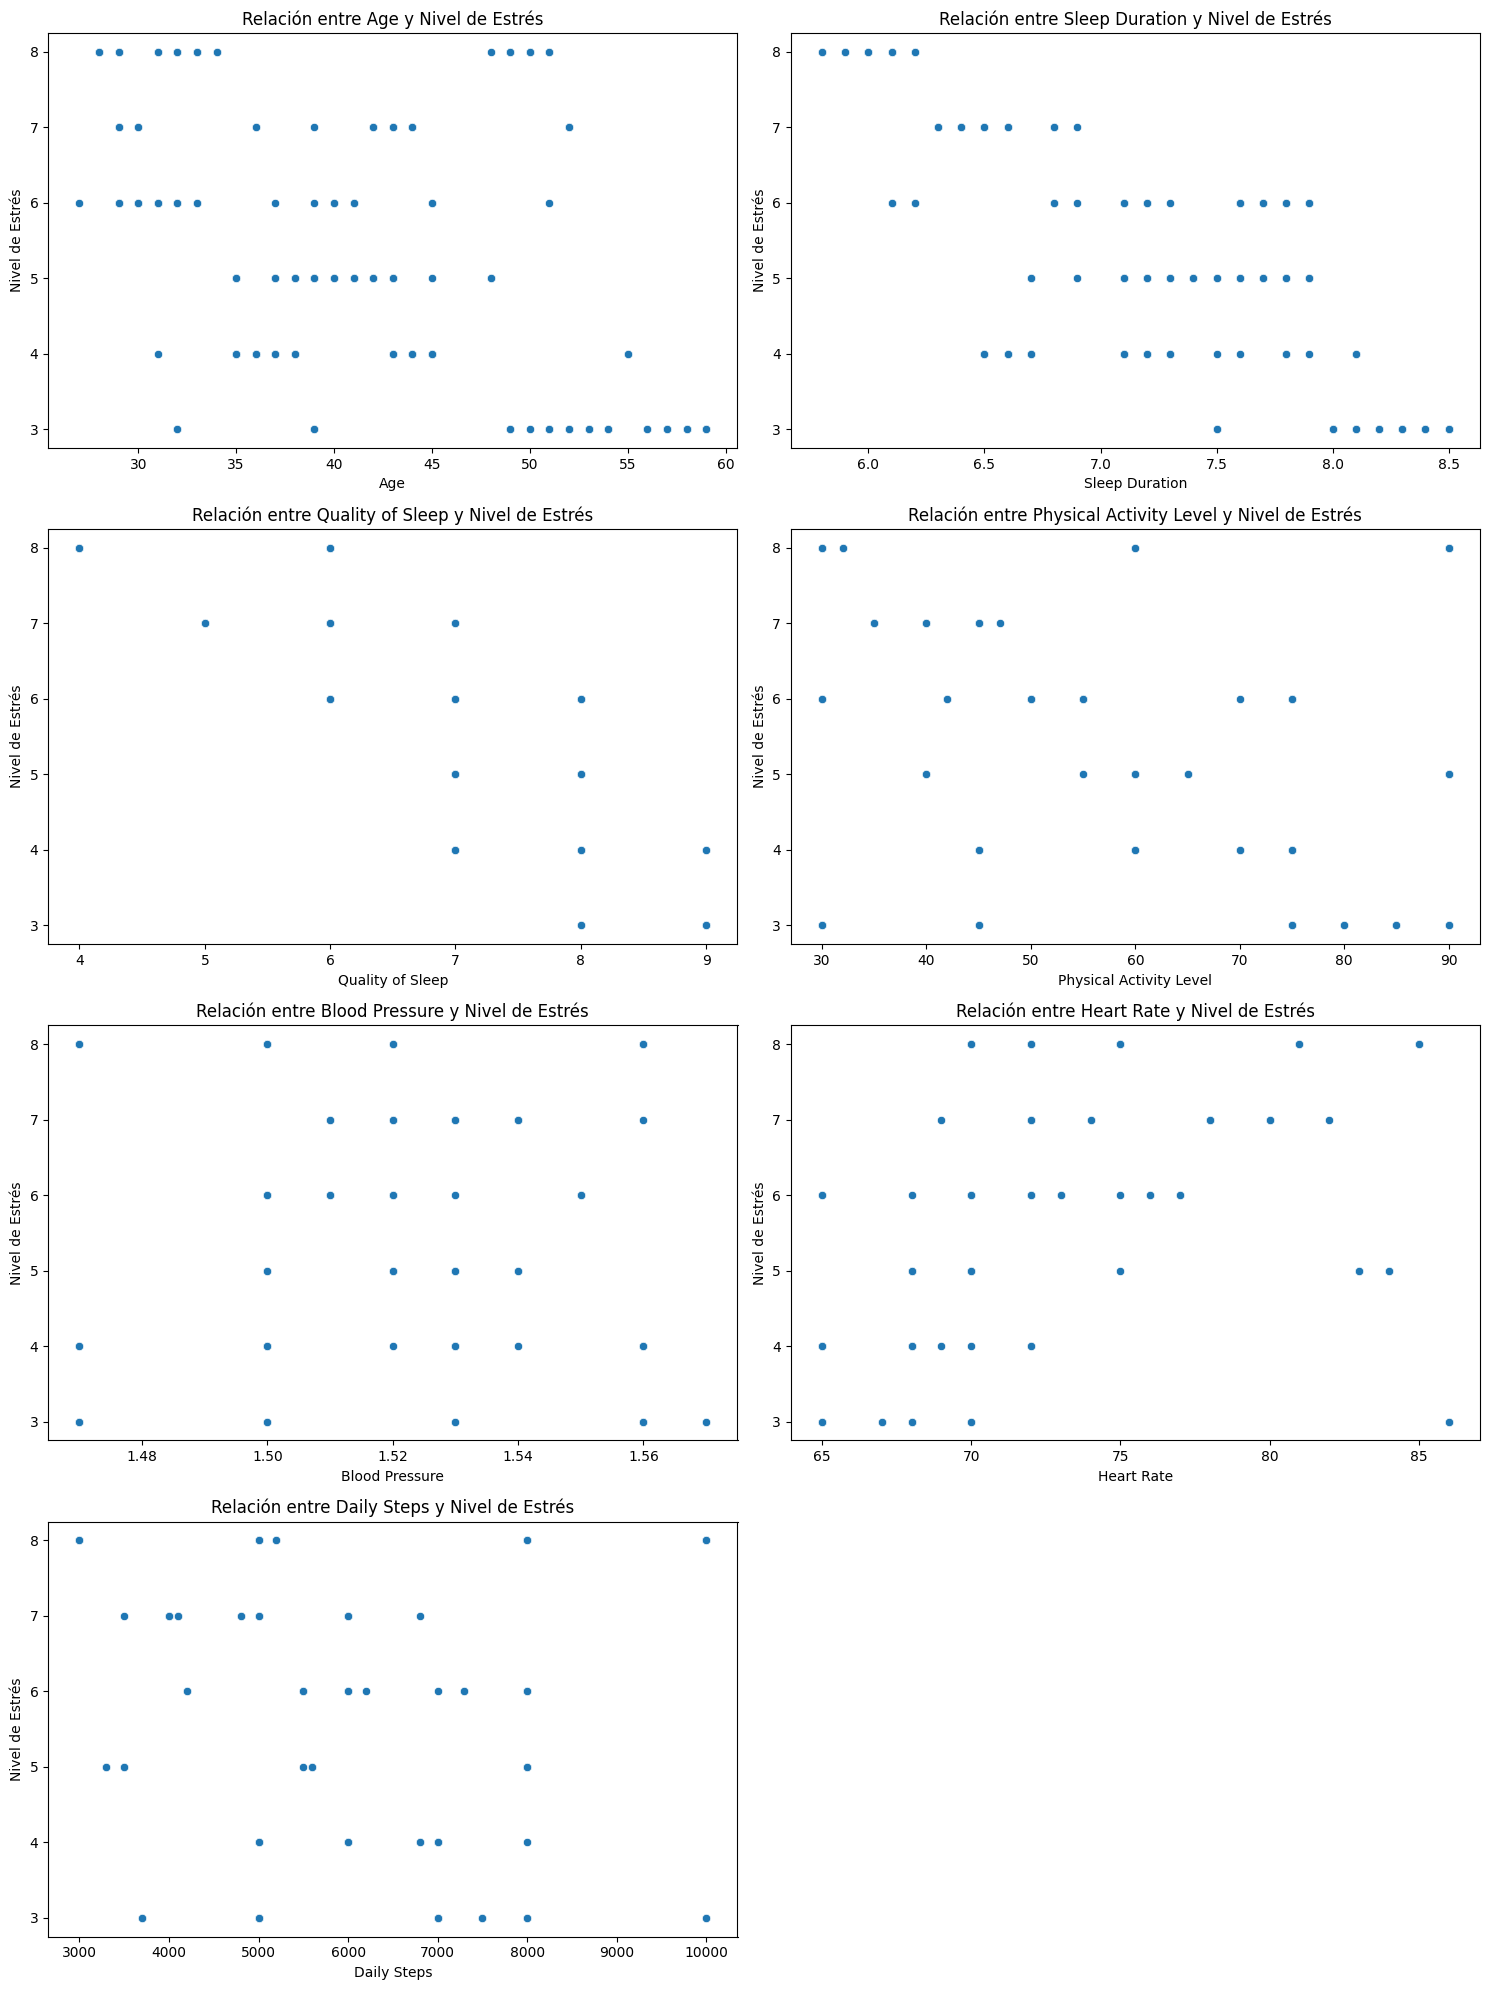

In [16]:
# Relación entre 'Stress Level' y variables numéricas
# Configuración de subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Aplanar la matriz de ejes para un acceso más fácil
axes = axes.flatten()

# Plot de las relaciones
for i, var in enumerate(numerical_vars):
    sns.scatterplot(x=df_stress_clean[var], y=df_stress_clean['Stress Level'], ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Nivel de Estrés')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Nivel de Estrés')

# Eliminar el último subplot si hay un número impar de subplots
fig.delaxes(axes[-1])

# Ajustar el layout
plt.tight_layout()
plt.show()

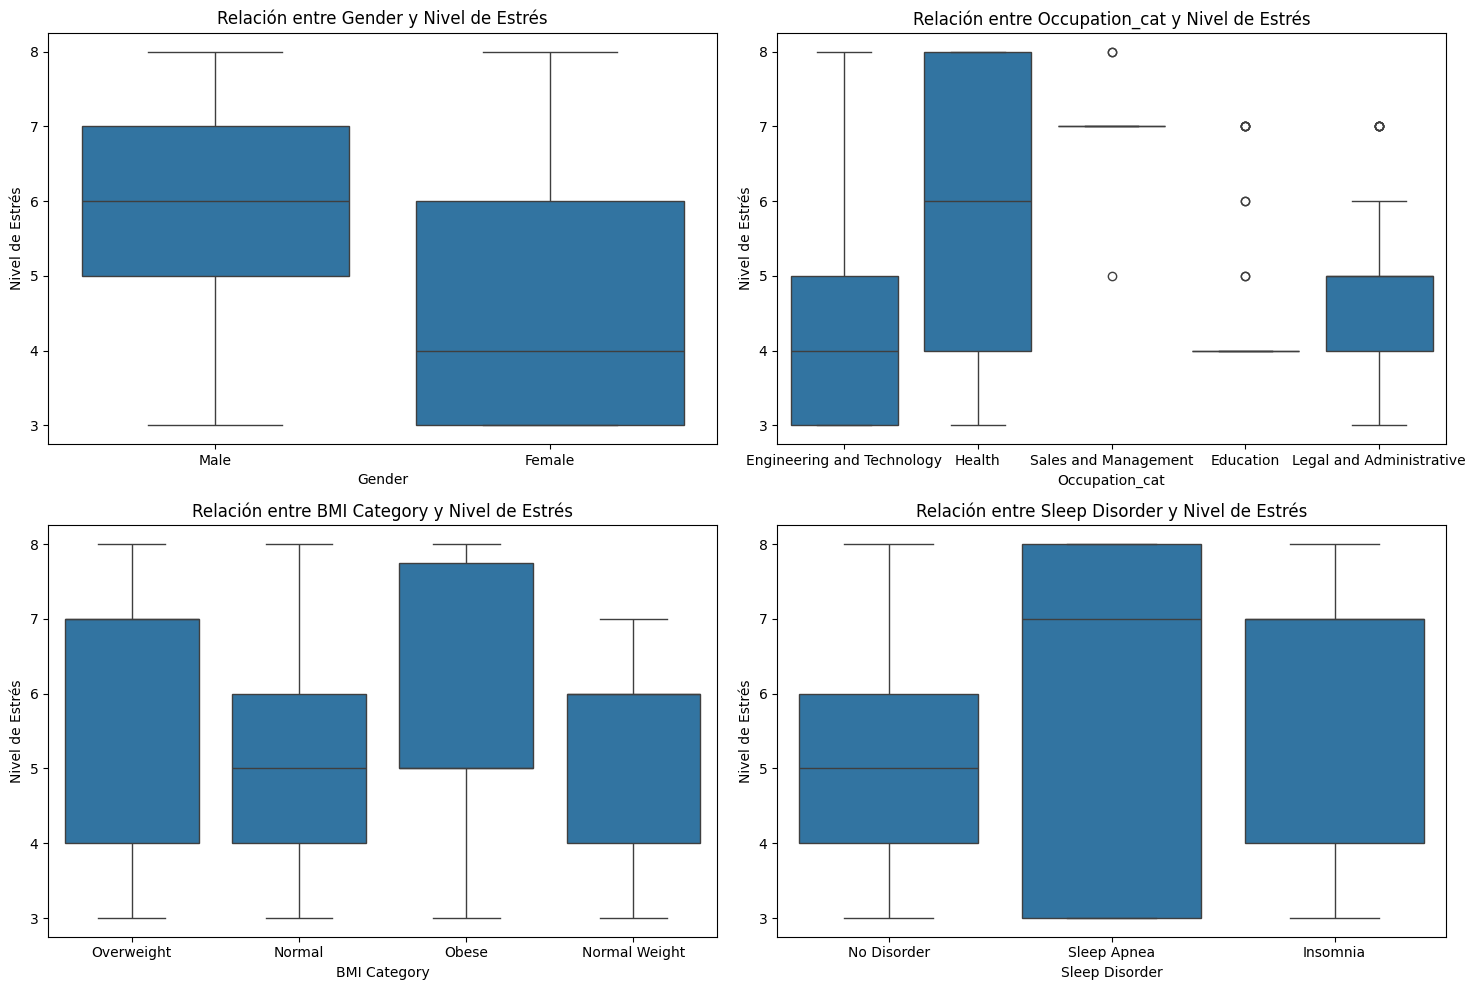

In [17]:
# Relación entre 'Stress Level' y variables categóricas
categorical_vars = ['Gender', 'Occupation_cat', 'BMI Category', 'Sleep Disorder']

# Configuración de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Aplanar la matriz de ejes para un acceso más fácil
axes = axes.flatten()

# Plot de las relaciones
for i, var in enumerate(categorical_vars):
    sns.boxplot(x=df_stress_clean[var], y=df_stress_clean['Stress Level'], ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Nivel de Estrés')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Nivel de Estrés')

# Ajustar el layout
plt.tight_layout()
plt.show()

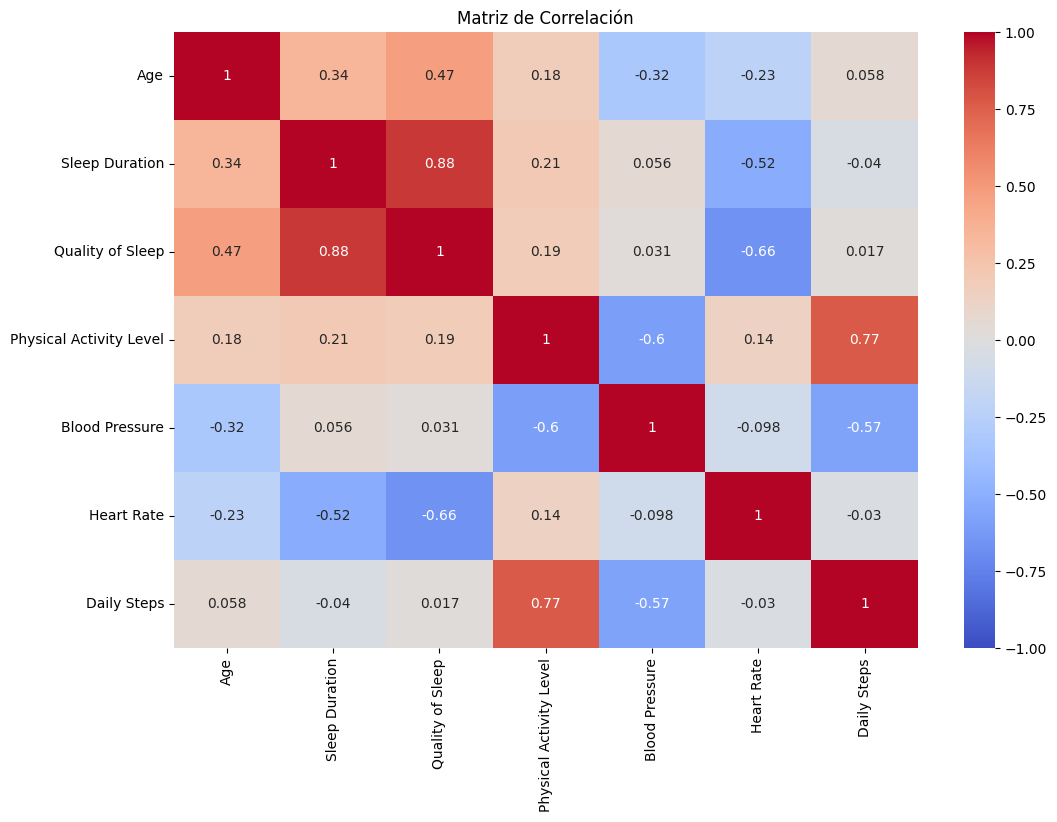

In [19]:
# Matriz de correlación
corr_matrix = df_stress_clean[numerical_vars].corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

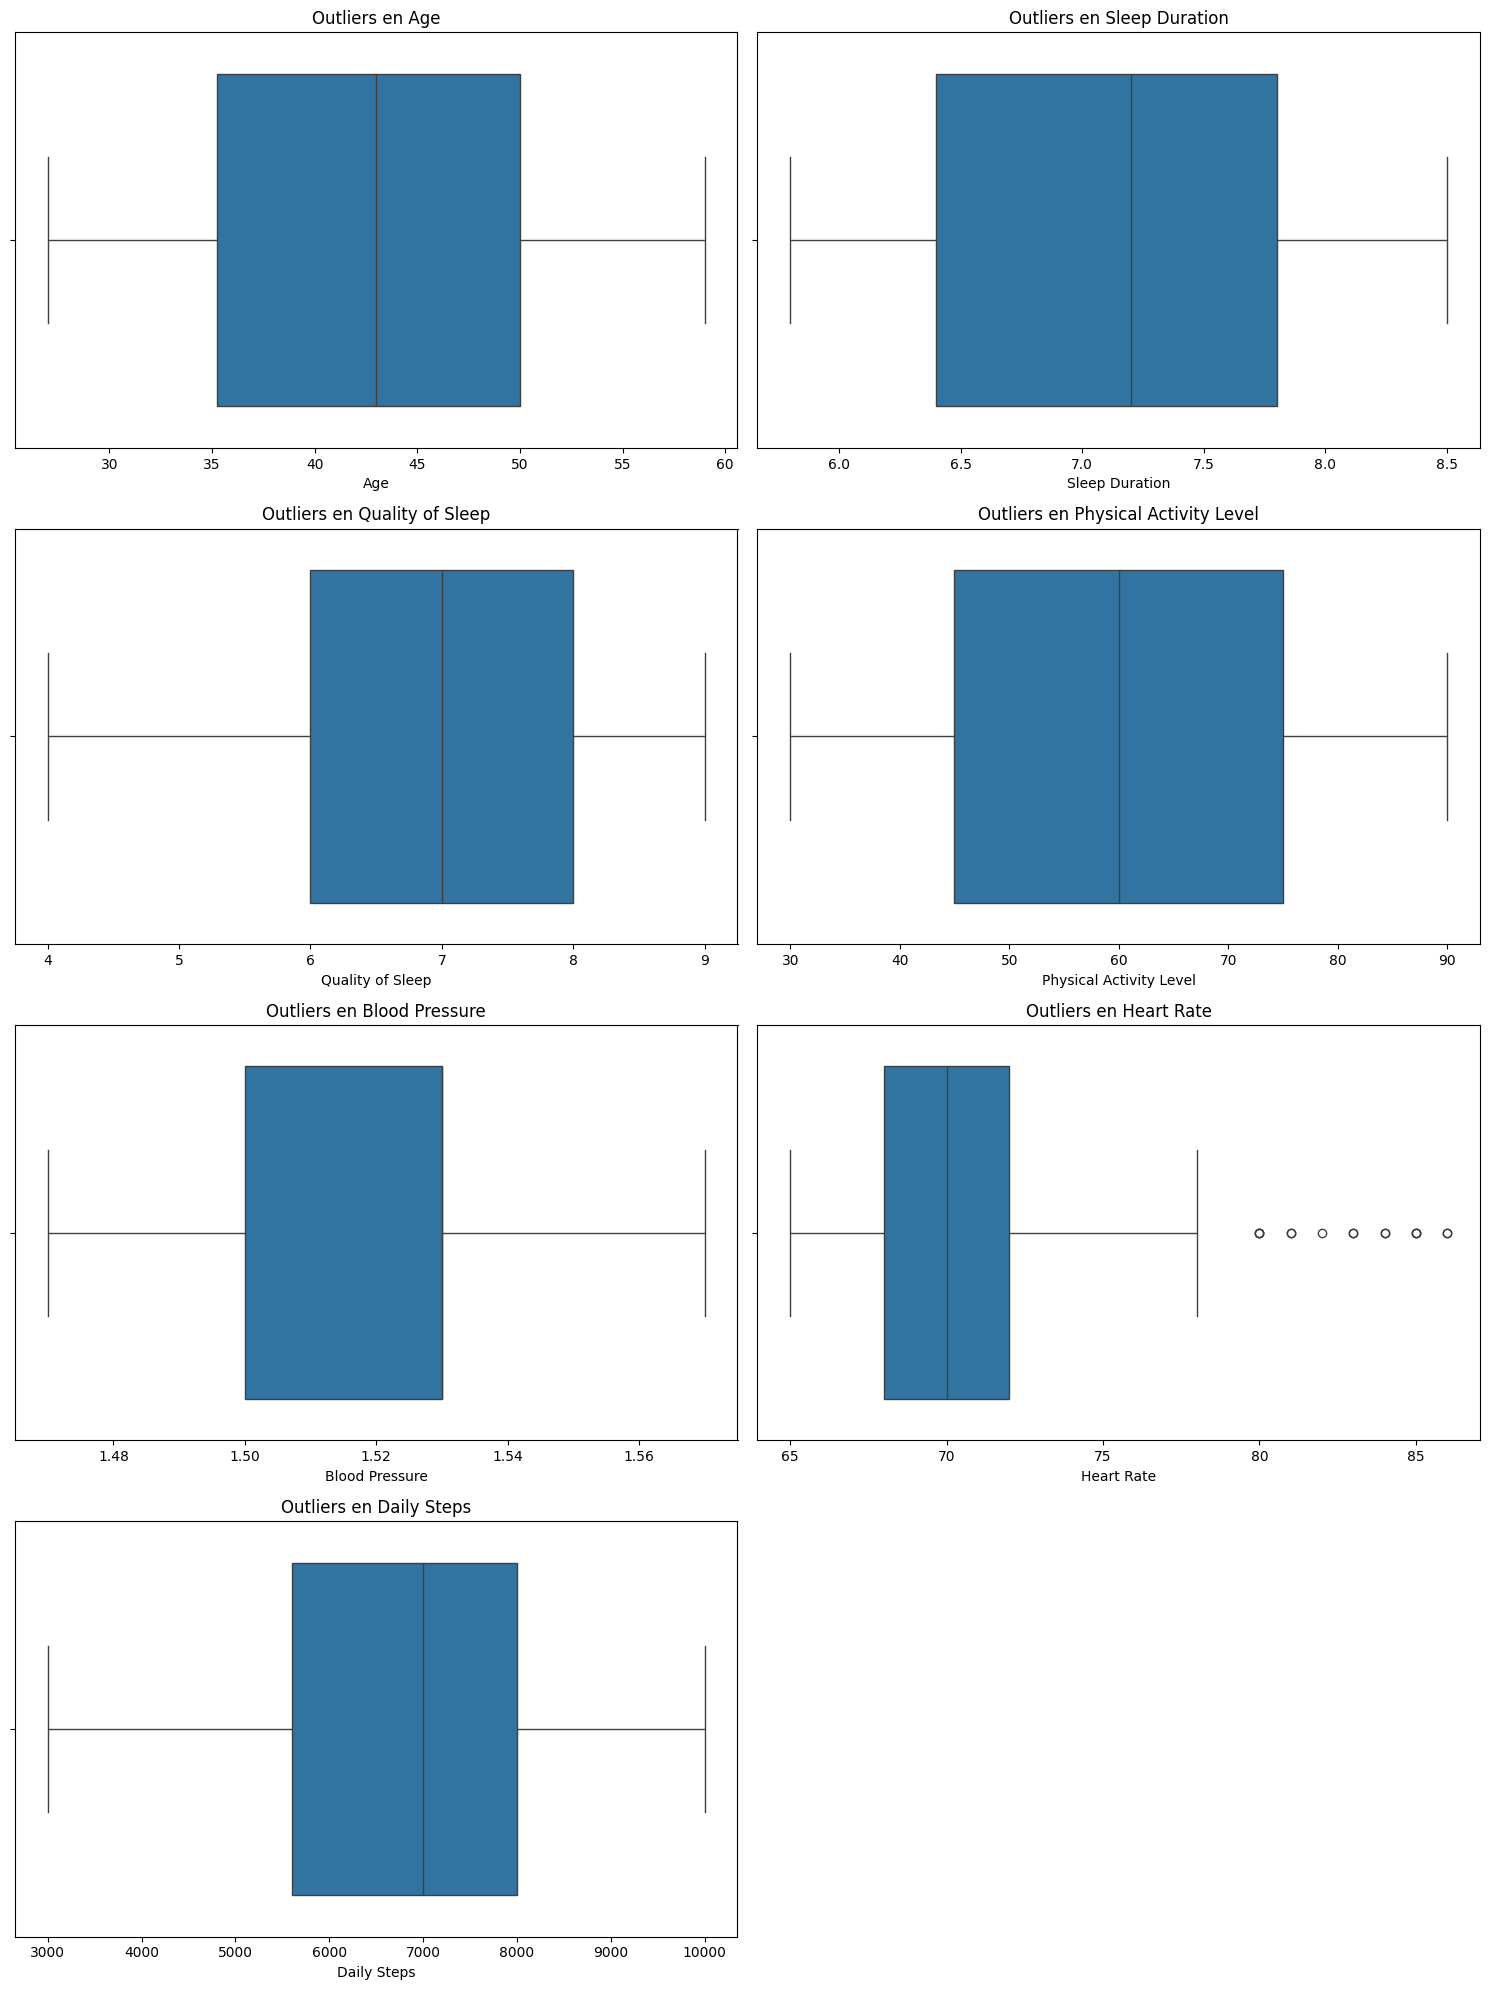

In [21]:
# Análisis de outliers
# Configuración de subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Aplanar la matriz de ejes para un acceso más fácil
axes = axes.flatten()

# Plot de los outliers
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=df_stress_clean[var], ax=axes[i])
    axes[i].set_title(f'Outliers en {var}')
    axes[i].set_xlabel(var)

# Eliminar el último subplot si hay un número impar de subplots
fig.delaxes(axes[-1])

# Ajustar el layout
plt.tight_layout()
plt.show()

Solo se observan outliers en la variable Heart Rate.

### 1.4. Codificación de las variables categóricas


In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

df_stress_clean['Gender'] = le.fit_transform(df_stress_clean['Gender'].values)
df_stress_clean['BMI Category'] = le.fit_transform(df_stress_clean['BMI Category'].values)
df_stress_clean['Sleep Disorder'] = le.fit_transform(df_stress_clean['Sleep Disorder'].values)
df_stress_clean['Occupation_cat'] = le.fit_transform(df_stress_clean['Occupation_cat'].values)

df_stress_clean.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occupation_cat
0,1,27,6.1,6,42,6,3,1.52,77,4200,1,1
1,1,28,6.2,6,60,8,0,1.56,75,10000,1,2
2,1,28,6.2,6,60,8,0,1.56,75,10000,1,2
3,1,28,5.9,4,30,8,2,1.56,85,3000,2,4
4,1,28,5.9,4,30,8,2,1.56,85,3000,2,4


## 2. Análisis de Componentes Principales (PCA)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Procesamiento de los datos 
X = df_stress_clean.drop(columns='Stress Level')
y = df_stress_clean['Stress Level']

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Aplicar PCA
pca = PCA(n_components=0.75)
principal_components = pca.fit_transform(X_scaled)

principal_components.shape

(374, 4)

Varianza explicada por cada componente: [0.28539073 0.24924259 0.17050174 0.08734513]
Varianza acumulada: [0.28539073 0.53463332 0.70513506 0.79248019]


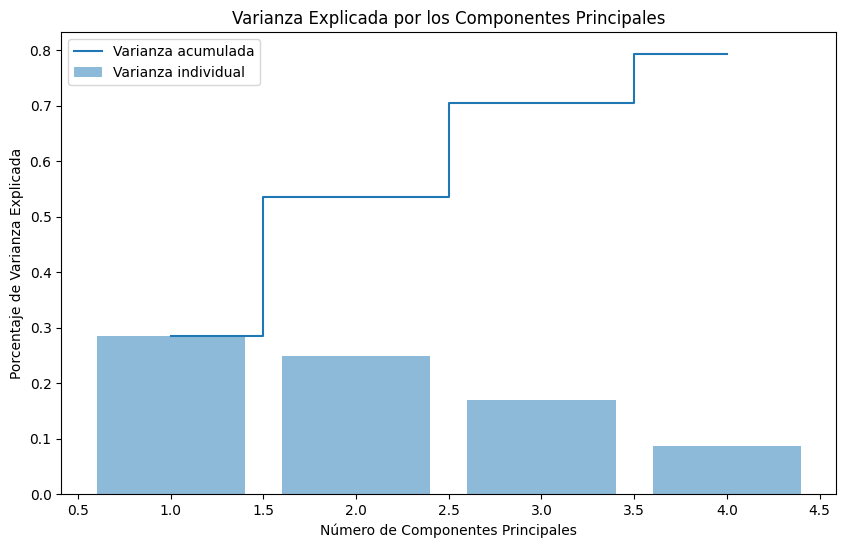

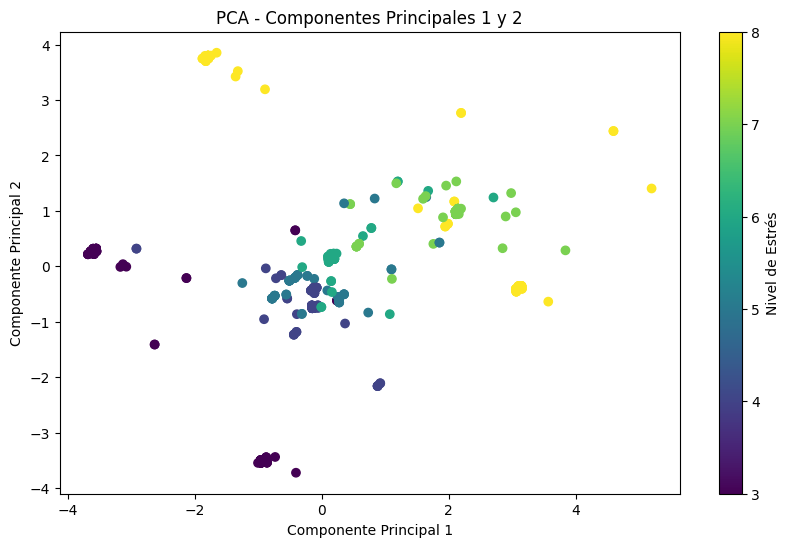

                              PC1       PC2       PC3       PC4
Gender                   0.335694  0.010268 -0.432644 -0.128021
Age                     -0.406522 -0.016964  0.342491 -0.385691
Sleep Duration          -0.325394 -0.394631 -0.189017 -0.157470
Quality of Sleep        -0.380029 -0.402338 -0.111940 -0.175168
Physical Activity Level -0.338601  0.275244 -0.394794 -0.002181
BMI Category            -0.117043  0.361092  0.486298 -0.225546
Blood Pressure           0.347907 -0.383801 -0.043708 -0.134815
Heart Rate               0.210016  0.422124 -0.002405 -0.097339
Daily Steps             -0.267721  0.295248 -0.394957  0.155967
Sleep Disorder          -0.301983  0.179249 -0.155886  0.164630
Occupation_cat           0.124022  0.176228 -0.269640 -0.805865


In [30]:
# Varianza explicada por los componentes principales
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Varianza explicada por cada componente:", explained_variance)
print("Varianza acumulada:", cumulative_variance)

# Visualización de la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5), explained_variance, alpha=0.5, align='center', label='Varianza individual')
plt.step(range(1, 5), cumulative_variance, where='mid', label='Varianza acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.title('Varianza Explicada por los Componentes Principales')
plt.legend(loc='best')
plt.show()

# Visualización de los primeros dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Componentes Principales 1 y 2')
plt.colorbar(label='Nivel de Estrés')
plt.show()

# Importancia de las características
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.columns)
print(pca_loadings)

## 3. Implementación de LDA

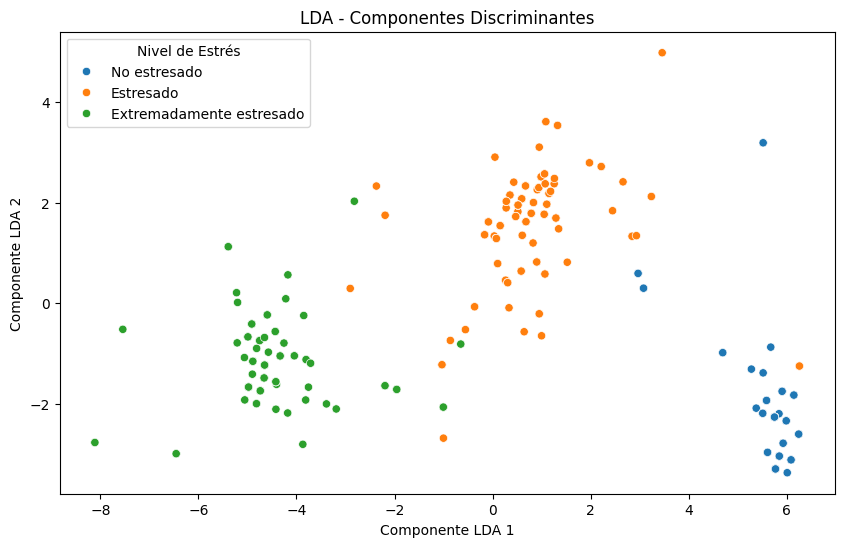

                            Gender       Age  Sleep Duration  \
Estresado                -0.766680 -4.009505        0.518314   
Extremadamente estresado  1.722283  5.597520       -7.890549   
No estresado             -0.934811  0.873761       12.000202   

                          Quality of Sleep  Physical Activity Level  \
Estresado                         3.361086                 2.528100   
Extremadamente estresado        -11.454065                 0.310502   
No estresado                     10.695902                -7.040879   

                          BMI Category  Blood Pressure  Heart Rate  \
Estresado                     1.451303        0.259966   -1.025917   
Extremadamente estresado     -3.290991        1.621188    0.731346   
No estresado                  1.821556       -3.410088    1.408188   

                          Daily Steps  Sleep Disorder  Occupation_cat  
Estresado                   -0.912697       -0.778176       -0.575707  
Extremadamente estresado     1.28

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Clasificación de los niveles de estrés en categorías
stress_bins = [0, 3, 6, 8]
stress_labels = ['No estresado', 'Estresado', 'Extremadamente estresado']
y_class = pd.cut(y, bins=stress_bins, labels=stress_labels)

# Codificación de etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_class)

# Aplicar LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(X_scaled, y_encoded)

# Visualización de LDA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lda_components[:, 0], y=lda_components[:, 1], hue=y_class)
plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.title('LDA - Componentes Discriminantes')
plt.legend(title='Nivel de Estrés')
plt.show()

# Importancia de las características en LDA
lda_coefficients = pd.DataFrame(lda.coef_, columns=X.columns, index=label_encoder.classes_)
print(lda_coefficients)

In [33]:
# Comparación de la importancia de características en PCA y LDA
pca_loadings_abs = pca_loadings.abs()
lda_coefficients_abs = lda_coefficients.abs().mean(axis=0)

comparison = pd.DataFrame({
    'PCA Importance (sum of 4 PCs)': pca_loadings_abs.sum(axis=1),
    'LDA Importance': lda_coefficients_abs
}).sort_values(by='PCA Importance (sum of 4 PCs)', ascending=False)

print(comparison)

                         PCA Importance (sum of 4 PCs)  LDA Importance
Occupation_cat                                1.375755        1.418656
BMI Category                                  1.189979        2.187950
Age                                           1.151667        3.493596
Daily Steps                                   1.113894        0.793215
Quality of Sleep                              1.069475        8.503684
Sleep Duration                                1.066513        6.803022
Physical Activity Level                       1.010820        3.293160
Blood Pressure                                0.910231        1.763747
Gender                                        0.906627        1.141258
Sleep Disorder                                0.801748        0.943097
Heart Rate                                    0.731885        1.055150


## Resultados y conclusión
La comparación de la importancia de las características utilizando PCA y LDA nos proporciona una visión clara de cuáles son las variables más relevantes para predecir el nivel de estrés y distinguir entre los diferentes niveles de estrés.

### Análisis de Resultados

#### Importancia según PCA

PCA nos muestra qué variables contribuyen más a la varianza total de los datos. Las variables con mayor importancia en PCA son:
1. **Occupation_cat**: 1.375755
2. **BMI Category**: 1.189979
3. **Age**: 1.151667
4. **Daily Steps**: 1.113894
5. **Quality of Sleep**: 1.069475

#### Importancia según LDA

LDA nos ayuda a identificar las variables que mejor separan los diferentes niveles de estrés. Las variables con mayor importancia en LDA son:
1. **Quality of Sleep**: 8.503684
2. **Sleep Duration**: 6.803022
3. **Age**: 3.493596
4. **Physical Activity Level**: 3.293160
5. **BMI Category**: 2.187950

### Respuesta y Argumentación

1. **Seleccionar un algoritmo que pueda indicar qué factor es más importante para determinar ese estrés**:
   - El **LDA** es más adecuado para identificar los factores que distinguen mejor entre los diferentes niveles de estrés. Esto se debe a que LDA considera las etiquetas de clase y maximiza la separación entre ellas.

2. **¿Es este componente el mismo que determinaste al usar el modelo de regresión?**:
   - Si en el modelo de regresión previo, las variables más importantes fueron la calidad del sueño y la duración del sueño, entonces los resultados son consistentes. Según LDA, **Quality of Sleep** y **Sleep Duration** son las variables más importantes para distinguir entre los niveles de estrés, lo cual confirma su relevancia.

3. **Determinar qué factores distinguen más los datos entre los niveles solicitados**:
   - Según LDA, los factores que distinguen más los datos entre los niveles de estrés son:
     1. **Quality of Sleep**: 8.503684
     2. **Sleep Duration**: 6.803022
     3. **Age**: 3.493596
     4. **Physical Activity Level**: 3.293160
     5. **BMI Category**: 2.187950

### Conclusión

Para identificar y entender mejor las causas del estrés, los factores clave que Recursos Humanos debería considerar son principalmente la **calidad del sueño**, la **duración del sueño**, la **edad** de los empleados, el **nivel de actividad física** y la **categoría de IMC**. Estos factores tienen la mayor importancia tanto en la varianza total de los datos como en la diferenciación entre los niveles de estrés.

Este análisis permite a Recursos Humanos tomar decisiones informadas y diseñar intervenciones específicas para abordar y prevenir el estrés en los empleados.